# Columns Information

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [63]:
# Importing Library

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set_palette("flare")
sns.set_context('notebook',font_scale = 1.2)

In [64]:
# Reading the Data

df = pd.read_csv("911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10/12/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10/12/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10/12/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10/12/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10/12/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [65]:
df.shape

(99491, 9)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99491 entries, 0 to 99490
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99491 non-null  float64
 1   lng        99491 non-null  float64
 2   desc       99491 non-null  object 
 3   zip        87043 non-null  float64
 4   title      99491 non-null  object 
 5   timeStamp  99491 non-null  object 
 6   twp        99460 non-null  object 
 7   addr       99491 non-null  object 
 8   e          99491 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Converting time stamp to DateTime Data type

In [67]:
df.timeStamp = pd.to_datetime(df.timeStamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99491 entries, 0 to 99490
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99491 non-null  float64       
 1   lng        99491 non-null  float64       
 2   desc       99491 non-null  object        
 3   zip        87043 non-null  float64       
 4   title      99491 non-null  object        
 5   timeStamp  99491 non-null  datetime64[ns]
 6   twp        99460 non-null  object        
 7   addr       99491 non-null  object        
 8   e          99491 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [68]:
# Null Values Count

df.isnull().sum()

lat              0
lng              0
desc             0
zip          12448
title            0
timeStamp        0
twp             31
addr             0
e                0
dtype: int64

# Top 5 Zipcode

In [69]:
df.zip.value_counts().head(5)

19401.0    7006
19464.0    6675
19403.0    4885
19446.0    4771
19406.0    3184
Name: zip, dtype: int64

# Top 5 Township

In [70]:
df.twp.value_counts().head()

LOWER MERION    8482
ABINGTON        5998
NORRISTOWN      5898
UPPER MERION    5234
CHELTENHAM      4582
Name: twp, dtype: int64

# Top 5 Reason for Call

In [71]:
df.title.value_counts().head()

Traffic: VEHICLE ACCIDENT -    23040
Traffic: DISABLED VEHICLE -     7440
Fire: FIRE ALARM                5528
EMS: RESPIRATORY EMERGENCY      5130
EMS: CARDIAC EMERGENCY          5043
Name: title, dtype: int64

# Data Wrangling for Feature Creation

We can extract some generalised features from the columns in our dataset for further analysis.

In the title column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon).

The timestamp column can be further segregated into Year, Month and Day of Week too.

In [72]:
df["reason"] = df.title.apply(lambda x : x.split(":")[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [73]:
# Reason value count

df.reason.value_counts(normalize=True)

EMS        0.493773
Traffic    0.355731
Fire       0.150496
Name: reason, dtype: float64

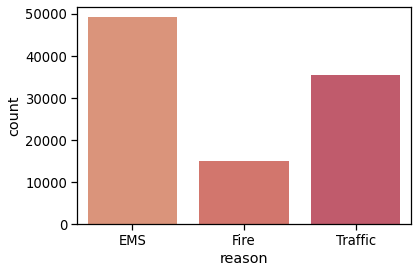

In [74]:
sns.countplot(df.reason)
plt.show()

In [75]:
df["hour"] = df.timeStamp.apply(lambda x : x.hour)
df['Month'] = df.timeStamp.apply(lambda x: x.month)
df['Day of Week'] = df.timeStamp.apply(lambda x: x.dayofweek)
df["Date"] = df.timeStamp.apply(lambda x: x.date())

In [76]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,0,2015-10-12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,0,2015-10-12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,10,0,2015-10-12


In [77]:
df["Day of Week"] = df["Day of Week"].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.sample(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Month,Day of Week,Date
78381,40.074370,-75.372085,FOREST RD & CRESTLINK RD; UPPER MERION; Stati...,19087.0,EMS: FALL VICTIM,2016-02-07 12:34:00,UPPER MERION,FOREST RD & CRESTLINK RD,1,EMS,12,2,Sun,2016-02-07
43981,40.182491,-75.090210,E COUNTY LINE RD & N WARMINSTER RD; UPPER MORE...,18974.0,Traffic: VEHICLE ACCIDENT -,2016-02-04 07:04:00,UPPER MORELAND,E COUNTY LINE RD & N WARMINSTER RD,1,Traffic,7,2,Thu,2016-02-04


# Count of Calls Received weekly  

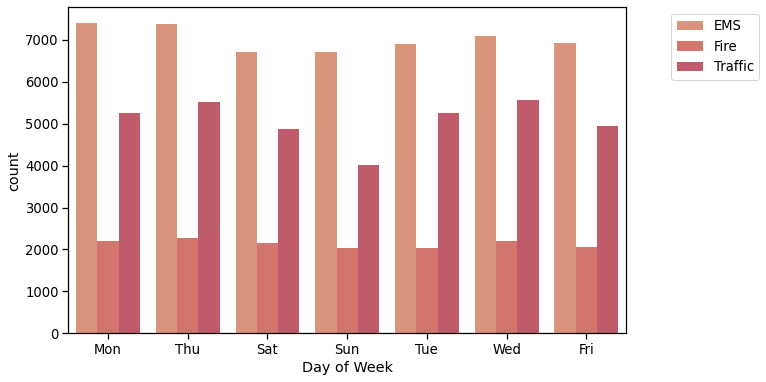

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(df["Day of Week"],hue=df.reason)
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

# Count of Calls Received Monthly  - Reason Wise

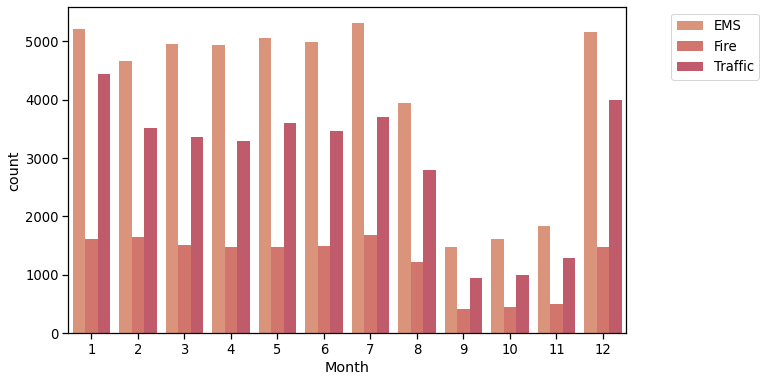

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(df["Month"],hue=df.reason)
plt.legend(bbox_to_anchor=(1.25,1))
plt.show()

# Number of Calls per Month

In [80]:
temp = pd.DataFrame(df.groupby("Month")["Month"].count())
temp.columns = ["Calls per Month"]
temp.head()

,Calls per Month
Month,
1,11259
2,9826
3,9830
4,9694
5,10138


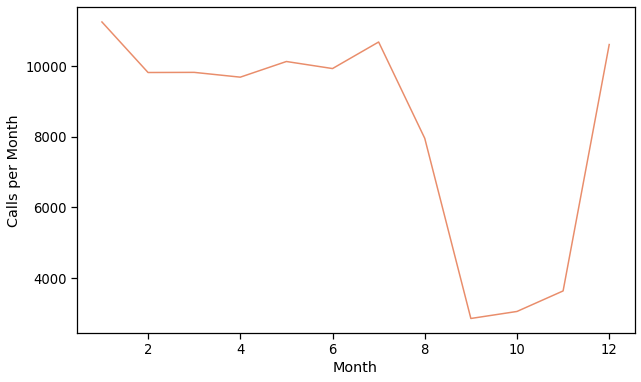

In [81]:
plt.figure(figsize=(10,6))
sns.lineplot(temp.index, temp["Calls per Month"])
plt.show()

# Number of Calls Received Per Day

In [82]:
temp = pd.DataFrame(df.groupby("Date")["Date"].count())
temp.columns = ["Calls Per Day"]
temp.head()

,Calls Per Day
Date,
2015-10-12,114
2015-11-12,391
2015-12-12,402
2015-12-13,316
2015-12-14,444


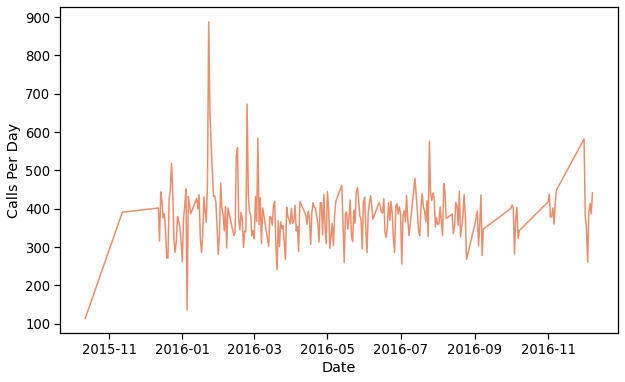

In [83]:
plt.figure(figsize=(10,6))
sns.lineplot(temp.index, temp["Calls Per Day"])
plt.show()

# Calls each Day based on Reason

In [92]:
def perDayCall(reason):
    temp = df[df.reason==reason]
    temp = pd.DataFrame(temp.groupby("Date")["Date"].count())
    temp.columns = [reason]
    plt.figure(figsize=(10,6))
    sns.lineplot(temp.index, temp[reason])
    plt.show()

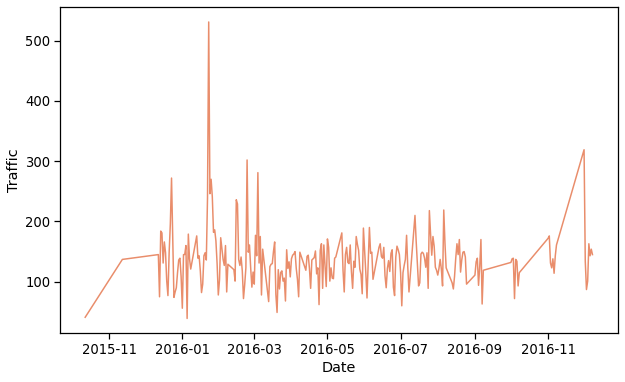

In [90]:
perDayCall("Traffic")

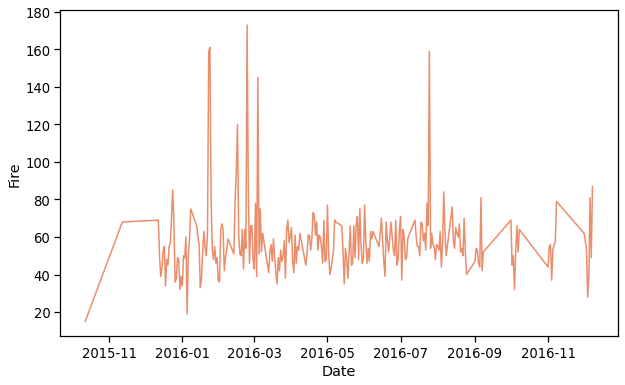

In [93]:
perDayCall("Fire")

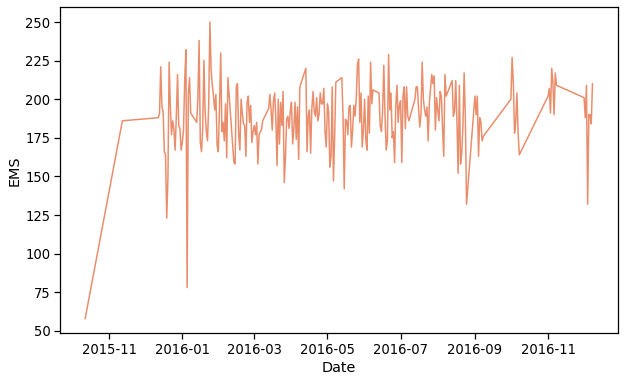

In [94]:
perDayCall("EMS")

# Calls per Day per Hour

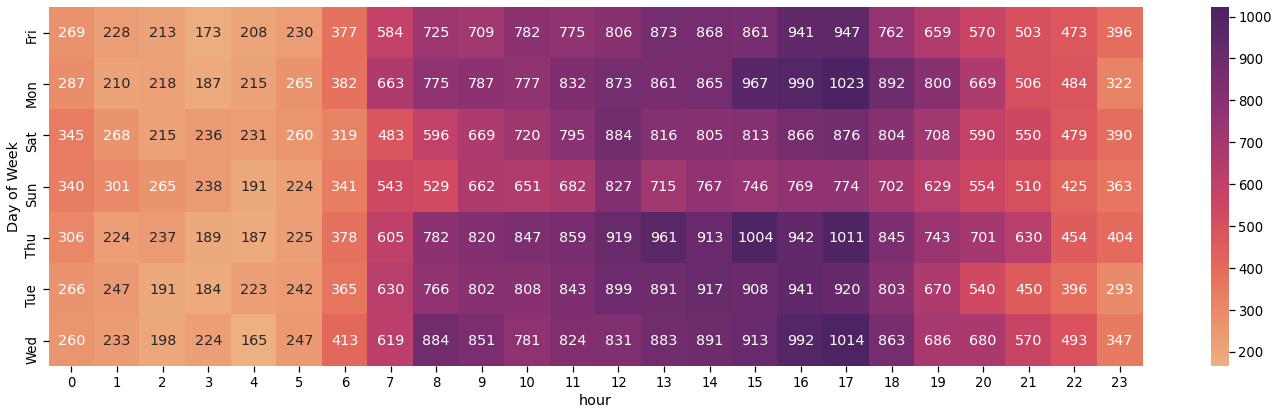

In [111]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.pivot_table(data=df, values="Month", index="Day of Week",columns="hour", aggfunc="count"), 
            annot=True, fmt='d', cmap="flare")
plt.tight_layout()
plt.show()

# Top 20 Township

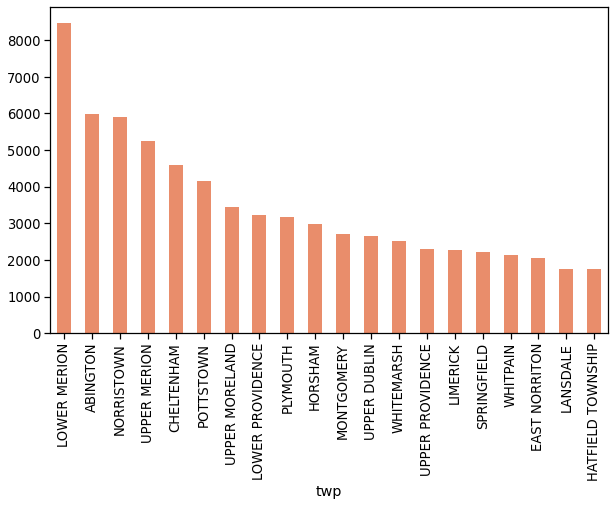

In [119]:
df.groupby("twp")["title"].count().sort_values(ascending=False)[:20].plot.bar(figsize=(10,6))
plt.show()

# Top 20 Most VEHICLE ACCIDENT Township 

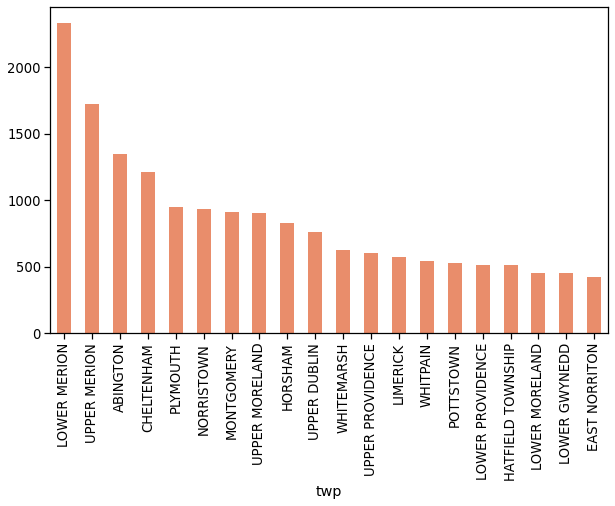

In [122]:
temp = df[df.title=="Traffic: VEHICLE ACCIDENT -"]
temp.groupby("twp")["title"].count().sort_values(ascending=False)[:20].plot.bar(figsize=(10,6))
plt.show()

# END